In [1]:
!pip install pydotplus

In [2]:
!pip install pydot

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
rand_state = 1000

In [5]:
data = pd.read_csv('../data/DataSet3.csv')

In [6]:
data.head()

,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,type_of_building
0,22400000.0,629.0,19.032800,72.896357,2.0,2.0,0.0,Under Construction,New Property,0.0,NaN,0.0,Flat
1,35000000.0,974.0,19.032800,72.896357,3.0,2.0,0.0,Under Construction,New Property,0.0,NaN,0.0,Flat
2,31700000.0,968.0,19.085600,72.909277,3.0,3.0,0.0,Under Construction,New Property,0.0,NaN,0.0,Flat
3,18700000.0,629.0,19.155756,72.846862,2.0,2.0,2.0,Ready to Move,New Property,2.0,NaN,2.0,Flat
4,13500000.0,1090.0,19.177555,72.849887,2.0,2.0,0.0,NaN,New Property,0.0,Unfurnished,0.0,Flat


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             6255 non-null   float64
 1   area              6255 non-null   float64
 2   latitude          6255 non-null   float64
 3   longitude         6255 non-null   float64
 4   Bedrooms          6255 non-null   float64
 5   Bathrooms         6255 non-null   float64
 6   Balcony           6255 non-null   float64
 7   Status            5774 non-null   object 
 8   neworold          6255 non-null   object 
 9   parking           6255 non-null   float64
 10  Furnished_status  3600 non-null   object 
 11  Lift              6255 non-null   float64
 12  type_of_building  6255 non-null   object 
dtypes: float64(9), object(4)
memory usage: 635.4+ KB


In [8]:
data = data.dropna()

In [9]:
data = data.rename(
    columns={
        'Bedrooms' : 'bedrooms',
        'Bathrooms' : 'bathrooms',
        'Balcony' : 'balcony',
        'Status' : 'status',
        'neworold' : 'new_or_old',
        'Furnished_status' : 'furnished_status',
        'Lift' : 'lift'})

In [10]:
data.columns

Index(['price', 'area', 'latitude', 'longitude', 'bedrooms', 'bathrooms',
       'balcony', 'status', 'new_or_old', 'parking', 'furnished_status',
       'lift', 'type_of_building'],
      dtype='object')

In [11]:
data['price']= data['price'].astype(int)
data['bedrooms']= data['bedrooms'].astype(int)
data['bathrooms']= data['bathrooms'].astype(int)
data['balcony']= data['balcony'].astype(int)
data['parking']= data['parking'].astype(int)
data['lift']= data['lift'].astype(int)
data['area']= data['area'].astype(int)

In [12]:
outlier = data[['price','area','latitude','longitude','bedrooms','bathrooms','balcony','parking','lift']]
outlier

,price,area,latitude,longitude,bedrooms,bathrooms,balcony,parking,lift
16,102000000,3180,19.057490,72.850961,4,4,1,1,1
17,22500000,1000,19.233532,72.839195,3,3,1,1,1
19,15500000,875,19.174674,72.943104,2,2,1,1,1
22,55000000,2430,19.154784,72.854061,4,4,4,4,4
24,23900000,950,19.137356,72.836952,2,2,0,0,0
...,...,...,...,...,...,...,...,...,...
6246,29000000,1250,19.028608,72.879402,3,3,1,1,1
6248,22000000,1200,19.211020,72.871720,3,3,0,0,0
6250,19500000,810,19.138320,72.810020,2,2,0,0,0
6251,22000000,1400,19.221920,72.854250,3,3,1,1,1


In [13]:
Q1 = outlier.quantile(0.25)
Q1

price        1.250000e+07
area         8.000000e+02
latitude     1.907907e+01
longitude    7.283087e+01
bedrooms     2.000000e+00
bathrooms    2.000000e+00
balcony      0.000000e+00
parking      0.000000e+00
lift         0.000000e+00
Name: 0.25, dtype: float64

In [14]:
Q3 = outlier.quantile(0.75)
Q3

price        3.000000e+07
area         1.250000e+03
latitude     1.921407e+01
longitude    7.287654e+01
bedrooms     3.000000e+00
bathrooms    3.000000e+00
balcony      1.000000e+00
parking      1.000000e+00
lift         1.000000e+00
Name: 0.75, dtype: float64

In [15]:
IQR = Q3-Q1

In [16]:
df = outlier[~((outlier < (Q1 - 1.5 * IQR)) |(outlier > (Q3 + 1.5 * IQR))).any(axis=1)]
df

,price,area,latitude,longitude,bedrooms,bathrooms,balcony,parking,lift
17,22500000,1000,19.233532,72.839195,3,3,1,1,1
19,15500000,875,19.174674,72.943104,2,2,1,1,1
24,23900000,950,19.137356,72.836952,2,2,0,0,0
25,25000000,900,19.128420,72.819880,2,2,1,1,1
29,39800000,1765,19.003832,72.850516,3,2,1,1,1
...,...,...,...,...,...,...,...,...,...
6246,29000000,1250,19.028608,72.879402,3,3,1,1,1
6248,22000000,1200,19.211020,72.871720,3,3,0,0,0
6250,19500000,810,19.138320,72.810020,2,2,0,0,0
6251,22000000,1400,19.221920,72.854250,3,3,1,1,1


In [17]:
index_list = list(df.index.values)

In [18]:
df = data[data.index.isin(index_list)]
df.head()

,price,area,latitude,longitude,bedrooms,bathrooms,balcony,status,new_or_old,parking,furnished_status,lift,type_of_building
17,22500000,1000,19.233532,72.839195,3,3,1,Ready to Move,Resale,1,Semi-Furnished,1,Flat
19,15500000,875,19.174674,72.943104,2,2,1,Ready to Move,Resale,1,Furnished,1,Flat
24,23900000,950,19.137356,72.836952,2,2,0,Ready to Move,Resale,0,Furnished,0,Flat
25,25000000,900,19.128420,72.819880,2,2,1,Ready to Move,Resale,1,Furnished,1,Flat
29,39800000,1765,19.003832,72.850516,3,2,1,Ready to Move,Resale,1,Semi-Furnished,1,Flat


In [19]:
df.status[df.status == 'Ready to Move'] = 1
df.status[df.status == 'Under Construction'] = 0

In [20]:
df.furnished_status[df.furnished_status == 'Furnished'] = 2
df.furnished_status[df.furnished_status == 'Semi-Furnished'] = 1
df.furnished_status[df.furnished_status == 'Unfurnished'] = 0

In [21]:
df.new_or_old[df.new_or_old == 'New Property'] = 1
df.new_or_old[df.new_or_old == 'Resale'] = 0

In [22]:
df.type_of_building[df.type_of_building == 'Flat'] = 1
df.type_of_building[df.type_of_building == 'Individual House'] = 2

In [23]:
df

,price,area,latitude,longitude,bedrooms,bathrooms,balcony,status,new_or_old,parking,furnished_status,lift,type_of_building
17,22500000,1000,19.233532,72.839195,3,3,1,1,0,1,1,1,1
19,15500000,875,19.174674,72.943104,2,2,1,1,0,1,2,1,1
24,23900000,950,19.137356,72.836952,2,2,0,1,0,0,2,0,1
25,25000000,900,19.128420,72.819880,2,2,1,1,0,1,2,1,1
29,39800000,1765,19.003832,72.850516,3,2,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6246,29000000,1250,19.028608,72.879402,3,3,1,1,0,1,2,1,1
6248,22000000,1200,19.211020,72.871720,3,3,0,1,0,0,0,0,1
6250,19500000,810,19.138320,72.810020,2,2,0,1,0,0,1,0,1
6251,22000000,1400,19.221920,72.854250,3,3,1,1,0,1,0,1,1


In [24]:
y = df["price"]
X = df.drop("price", axis = 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000)

In [25]:
X_train.head()

,area,latitude,longitude,bedrooms,bathrooms,balcony,status,new_or_old,parking,furnished_status,lift,type_of_building
1159,750,18.949759,72.829392,2,2,0,1,0,0,1,0,1
3693,850,19.030280,72.867360,2,2,0,1,0,0,1,0,1
5085,890,19.119318,72.863968,2,2,0,1,1,0,1,0,1
2743,850,19.059559,72.839178,2,2,0,1,0,0,0,0,1
1921,900,18.967808,72.829308,2,2,2,1,0,2,0,2,1


In [26]:
from sklearn.tree import DecisionTreeRegressor, export_text, export_graphviz

In [27]:
Tree_regressor = DecisionTreeRegressor()
Tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [28]:
y_hat = Tree_regressor.predict(X_test)

In [29]:
predictions = pd.DataFrame({ 'y_test':y_test,'y_hat':y_hat})
predictions.head()

,y_test,y_hat
1704,41000000,25500000.0
4961,6000000,6000000.0
6159,56000000,45000000.0
2911,17500000,17000000.0
5009,14000000,15000000.0


## Оценка модели

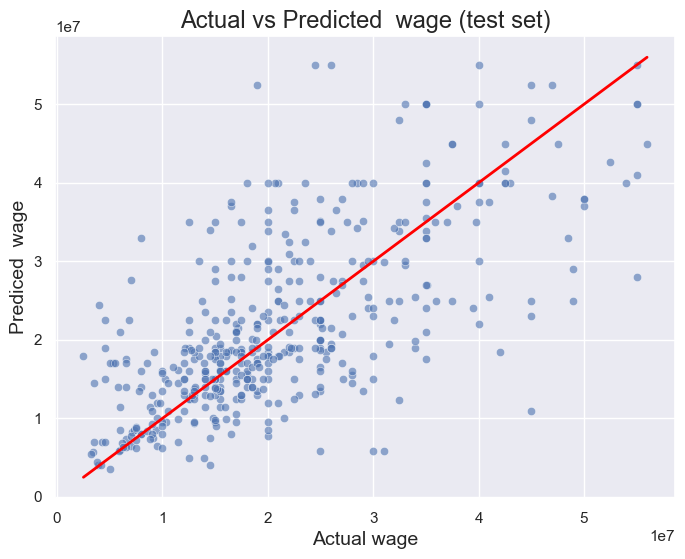

In [30]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_hat, alpha=0.6)
sns.lineplot(x=y_test, y=y_test, color='red', linewidth=2)
plt.xlabel('Actual wage', fontsize=14)
plt.ylabel('Prediced  wage', fontsize=14)
plt.title('Actual vs Predicted  wage (test set)', fontsize=17)
plt.show()

In [70]:
MSE_test = round(np.mean(np.square(y_test - y_hat)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
MSE_test,RMSE_test

(78764614799501.77, 8874943.09)

## Подбор гиперпараметра

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
path = DecisionTreeRegressor().cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas

In [34]:
len(ccp_alphas)

1365

In [35]:
path.keys()

dict_keys(['ccp_alphas', 'impurities'])

In [36]:
path

{'ccp_alphas': array([0.00000000e+00, 2.39700375e+06, 2.80898876e+06, ...,
        6.58641471e+12, 1.45289686e+13, 2.78627558e+13]),
 'impurities': array([1.89468633e+11, 1.89471030e+11, 1.89473839e+11, ...,
        8.34648314e+13, 9.79938000e+13, 1.25856556e+14])}

In [37]:
RMSE_CV=[]
for alpha in ccp_alphas:
    MSE = -cross_val_score(estimator = DecisionTreeRegressor(random_state=1,ccp_alpha=alpha), X = X_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )
    RMSE_CV.append(np.sqrt(MSE).mean())

output = pd.DataFrame(list(ccp_alphas), columns=['alpha'])
output['RMSE_CV']=RMSE_CV

output.head()

,alpha,RMSE_CV
0,0.000000e+00,9.490115e+06
1,2.397004e+06,9.490114e+06
2,2.808989e+06,9.490114e+06
3,2.808989e+06,9.490114e+06
4,2.808989e+06,9.490114e+06


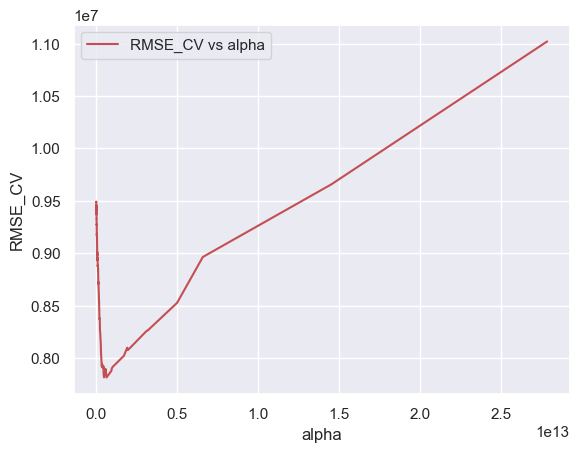

In [38]:
sns.lineplot(x='alpha', y='RMSE_CV', data=output , color='r', label="RMSE_CV vs alpha")
plt.show()

In [39]:
np.argmin(output['RMSE_CV'])

1351

In [40]:
output.iloc[np.argmin(output['RMSE_CV']),]

alpha      6.356546e+11
RMSE_CV    7.813641e+06
Name: 1351, dtype: float64

In [41]:
optimal_alpha = output.iloc[np.argmin(output['RMSE_CV']),][0]
optimal_alpha

635654594176.7432

In [42]:
optimal_DT = DecisionTreeRegressor(ccp_alpha=optimal_alpha)
optimal_DT.fit(X_train, y_train)
y_hat_opt = optimal_DT.predict(X_test)

In [43]:
MSE_test = round(np.mean(np.square(y_test - y_hat_opt)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

7297126.77

In [44]:
optimal_DT.get_params()

{'ccp_alpha': 635654594176.7432,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

## Визуализация дерева

In [45]:
dtree= DecisionTreeRegressor(ccp_alpha=optimal_alpha)
dtree.fit(X_train, y_train)
wage_hat = dtree.predict(X_test)

In [46]:
from sklearn import tree

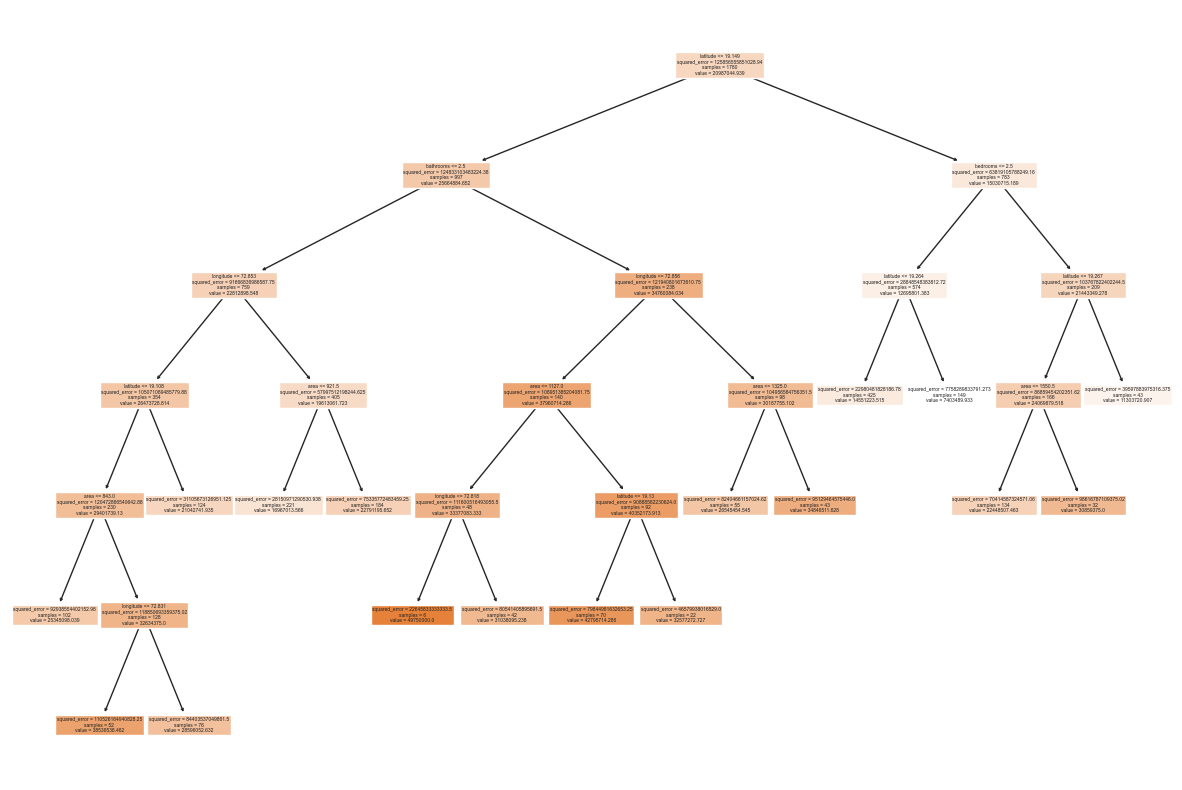

In [47]:
fig = plt.figure(figsize=(15,10))
DT_plot = tree.plot_tree(dtree, feature_names=X_train.columns, filled=True)

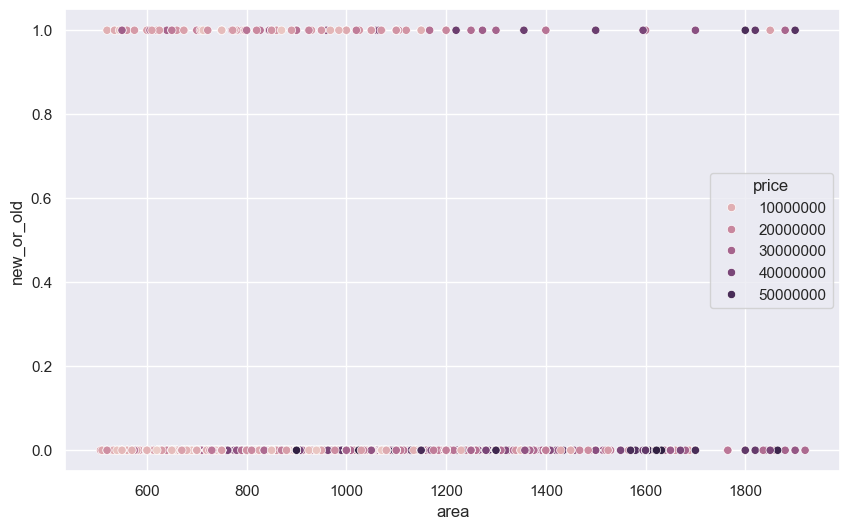

In [48]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='area', y='new_or_old', data=df, hue='price')
plt.show()

In [49]:
fig.savefig("DT_plot_Regression.png")

## Решающие правила

In [50]:
tree_rules = export_text(Tree_regressor, feature_names=list(X.columns))
print(tree_rules)

|--- latitude <= 19.15
|   |--- bathrooms <= 2.50
|   |   |--- longitude <= 72.85
|   |   |   |--- latitude <= 19.11
|   |   |   |   |--- area <= 843.00
|   |   |   |   |   |--- latitude <= 18.94
|   |   |   |   |   |   |--- value: [55000000.00]
|   |   |   |   |   |--- latitude >  18.94
|   |   |   |   |   |   |--- latitude <= 18.95
|   |   |   |   |   |   |   |--- latitude <= 18.94
|   |   |   |   |   |   |   |   |--- value: [2200000.00]
|   |   |   |   |   |   |   |--- latitude >  18.94
|   |   |   |   |   |   |   |   |--- value: [3800000.00]
|   |   |   |   |   |   |--- latitude >  18.95
|   |   |   |   |   |   |   |--- latitude <= 19.02
|   |   |   |   |   |   |   |   |--- bedrooms <= 2.50
|   |   |   |   |   |   |   |   |   |--- lift <= 1.50
|   |   |   |   |   |   |   |   |   |   |--- longitude <= 72.83
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 9
|   |   |   |   |   |   |   |   |   |   |--- longitude >  72.83
|   |   |   |   |   |   |   |   |   |

## PyCaret

In [51]:
from pycaret.utils import version
version()

'3.2.0'

In [52]:
df_py = pd.read_csv('../data/DataSet3.csv')

In [53]:
from pycaret.regression import *

In [54]:
setup(data=df_py,  target='price', session_id=555, train_size=0.7, preprocess=True)

,Description,Value
0,Session id,555
1,Target,price
2,Target type,Regression
3,Original data shape,"(6255, 13)"
4,Transformed data shape,"(6255, 15)"
5,Transformed train set shape,"(4378, 15)"
6,Transformed test set shape,"(1877, 15)"
7,Ordinal features,3
8,Numeric features,8
9,Categorical features,4


In [55]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [56]:
dt_reg = create_model(estimator='dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,8756067.3516,320982014055365.3125,17915970.9214,0.6738,0.4907,0.3108
1,7568135.4642,190499034424150.1875,13802138.7627,0.6559,0.3927,0.3067
2,8906719.9391,378245914180618.9375,19448545.2973,0.3742,0.4666,0.3371
3,8969619.4825,277284088990360.2188,16651849.4165,0.5726,0.4657,0.3577
4,8322374.4292,321555028767123.3125,17931955.5199,0.6331,0.4132,0.3224
5,10006255.7078,634096851141552.5000,25181279.7757,0.4566,0.4296,0.3381
6,8482465.7534,256364847945205.4375,16011397.4389,0.6126,0.4889,0.4264
7,10481141.5525,489287929680365.3750,22119853.7446,0.6668,0.4526,0.3541
8,9335011.4416,526379759267734.5000,22942967.5340,0.2566,0.4543,0.3703


In [57]:
tuned_dt_reg = tune_model(dt_reg)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,8260808.2125,298698635987021.9375,17282900.1035,0.6965,0.3489,0.2869
1,6945912.6684,138543335311976.5312,11770443.2929,0.7498,0.3416,0.2814
2,7443900.3797,261535914128292.5625,16172072.0419,0.5673,0.3596,0.2942
3,7297964.6236,154090001999650.2812,12413299.4002,0.7625,0.3904,0.3190
4,7977632.6233,247927477419836.5625,15745712.9854,0.7171,0.3629,0.3061
5,8806738.9477,562096522783217.1250,23708574.8788,0.5183,0.3643,0.2775
6,7711851.9501,256988194427321.0938,16030851.3320,0.6116,0.3854,0.3406
7,8807269.4305,412110085161335.0625,20300494.7024,0.7193,0.3591,0.2881
8,7710954.4148,299006792888839.8750,17291812.8861,0.5777,0.3532,0.3045


Fitting 10 folds for each of 10 candidates, totalling 100 fits


## CART

In [60]:
tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

Errore Quadratico Medio (MSE): 76567013260538.14
Coefficient of Determination (R^2): 0.3835977502315808


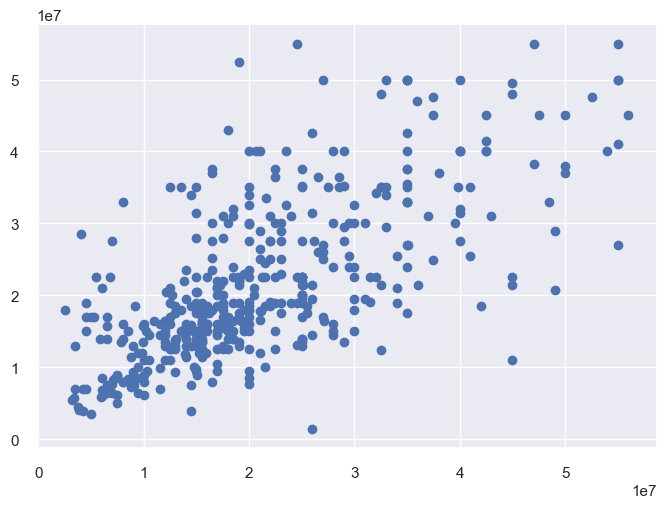

In [65]:
y_pred = tree_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Errore Quadratico Medio (MSE):", mse)

r2 = r2_score(y_test, y_pred)
print("Coefficient of Determination (R^2):", r2)
plt.scatter(y_test, y_pred)
plt.show()


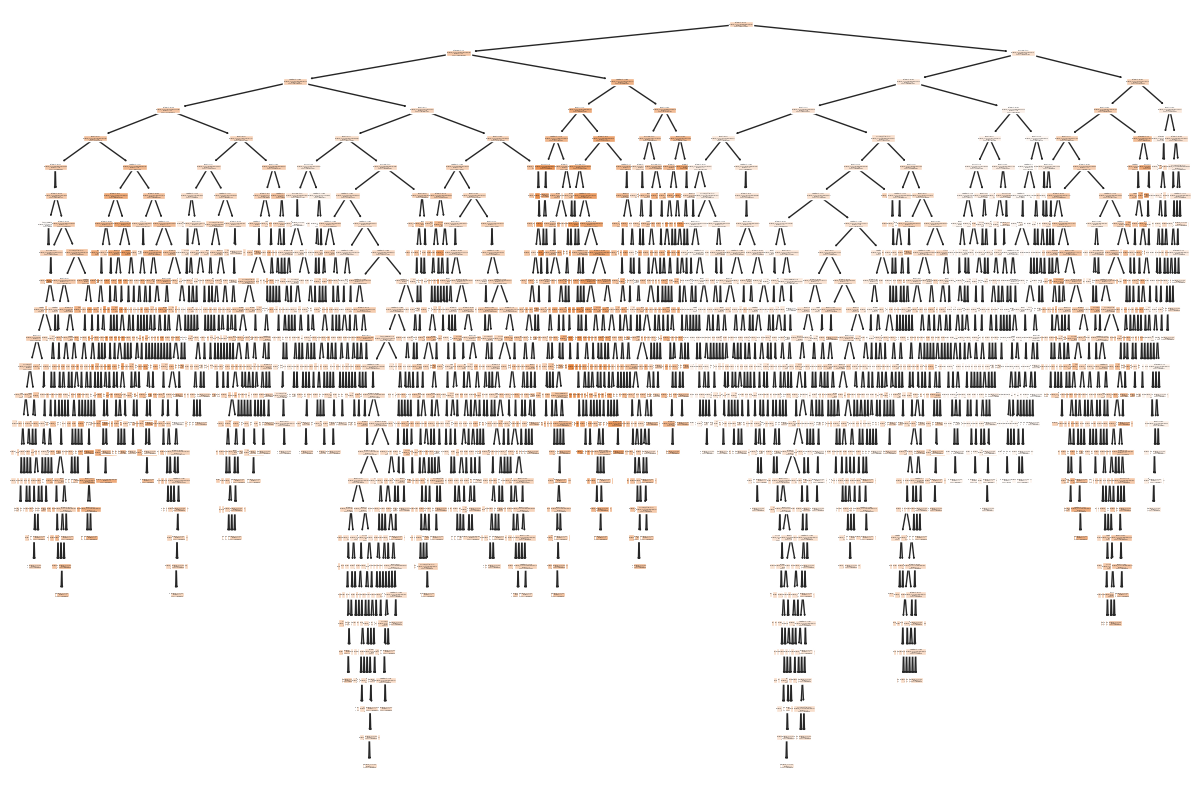

In [67]:
fig = plt.figure(figsize=(15,10))
plot = tree.plot_tree(tree_regressor, feature_names=X_train.columns, filled=True)

## BaggingRegressor

In [68]:
from sklearn.ensemble import BaggingRegressor

In [71]:
clf = BaggingRegressor(estimator=dtree, n_estimators=10).fit(X_train, y_train)
y_br_pred = clf.predict(X_test)

MSE_test = round(np.mean(np.square(y_test - y_br_pred)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
MSE_test,RMSE_test

(46189284792845.57, 6796269.92)

## GradientBoostingRegressor

In [73]:
from sklearn.ensemble import GradientBoostingRegressor
clf = GradientBoostingRegressor(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
clf.fit(X_train, y_train)
predict = clf.predict(X_test)

In [75]:
MSE_test = round(np.mean(np.square(y_test - predict)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
MSE_test,RMSE_test

(59187474798318.8, 7693339.64)

## StackingRegressor

In [76]:
from sklearn.ensemble import StackingRegressor
clf = StackingRegressor(estimators = [("dtr", dtree)], final_estimator=dtree).fit(X_train, y_train)
y_sc_pred = clf.predict(X_test)

MSE_test = round(np.mean(np.square(y_test - y_sc_pred)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
MSE_test,RMSE_test

(56087080588184.88, 7489130.83)